# Sticker times

straightforward -- just looking at how long it takes for the mice to remove each sticker

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

import ipympl

Pull in the sticker times

In [36]:
kb_df = pd.read_csv('Z:\ASAP\iMCI-P60induction\sticker_timestamps_v2.csv')

kb_df['timestamp'] = pd.to_datetime(kb_df.time)

Go through each mouse, and plot the time elapsed

Text(0.5, 1.0, 'White Sticker')

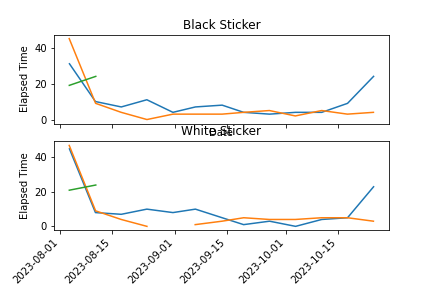

In [37]:
labeled_df = kb_df.loc[kb_df['in_box'].notna()]

mice = labeled_df['mouse_id'].unique()
fig,ax = plt.subplots(nrows=2, sharex=True)
fig.autofmt_xdate(rotation=45)

for mouse in mice:
    mouse_df = labeled_df.loc[labeled_df['mouse_id'] == mouse]
    ax[0].plot(mouse_df['timestamp'], mouse_df['black_sticker'] - mouse_df['in_box'])
    ax[1].plot(mouse_df['timestamp'], mouse_df['white_sticker'] - mouse_df['in_box'])


for axis in ax:
    axis.set(xlabel='Date', ylabel='Elapsed Time')

ax[0].set_title('Black Sticker')
ax[1].set_title('White Sticker')

# ax.plot(kb_df['time'], kb_df[])




# Pull in Arin's data

Then we can compare the differences

In [33]:
# pull in only the sticker data that has already had the "start time" removed
ap_df = pd.read_excel('C:\\Users\\17204\\Downloads\\ASAP surgery & behavior main.xlsx', sheet_name='iMCI_P60_sticker', index_col=[0,1], header=[0,1]).iloc[27:,:]

# get rid of the empty rows
ap_df = ap_df.dropna(axis=0, how='all')

# grab only the sticker values
idx = pd.IndexSlice # makes life easier with multiIndex slices
s_one = ap_df.loc[idx[:], idx[:, 'sticker 1']].T.values
s_two = ap_df.loc[idx[:], idx[:, 'sticker 2']].T.values



Plots 

1. Individual mice, "sticker one" and "sticker two"
2. across mouse mean for each sticker

Text(0.5, 1.0, 'Sticker Two')

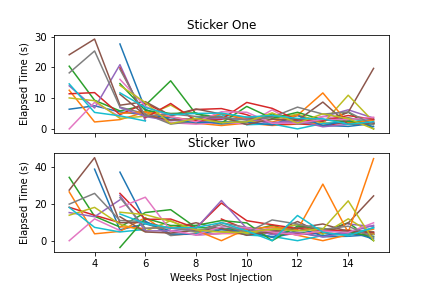

In [34]:
# make some plots
fig_indiv, ax_indiv = plt.subplots(nrows=2, sharex=True)

ax_indiv[0].plot(range(3,16), s_one)
ax_indiv[1].plot(range(3,16), s_two)

ax_indiv[0].set_ylabel('Elapsed Time (s)')
ax_indiv[1].set_ylabel('Elapsed Time (s)')
ax_indiv[0].set_title('Sticker One')
ax_indiv[1].set_xlabel('Weeks Post Injection')
ax_indiv[1].set_title('Sticker Two')

# ap_df.loc[idx[:], idx[:,'sticker 1']].T

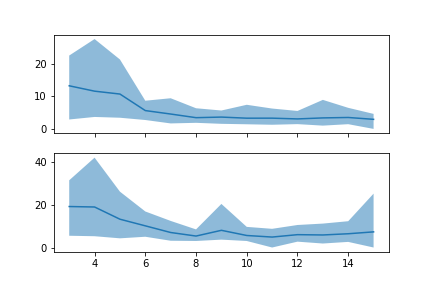

In [32]:
fig_av, ax_av = plt.subplots(nrows=2, sharex=True)

ax_av[0].plot(range(3,16), np.nanmean(s_one, axis=1))
quantile_patch = plt.Polygon(list(zip(range(3,16), np.nanquantile(s_one, 0.95, axis=1))) + list(zip(range(3,16), np.nanquantile(s_one, 0.05, axis=1)))[::-1], alpha=0.5)
ax_av[0].add_patch(quantile_patch)

ax_av[1].plot(range(3,16), np.nanmean(s_two, axis=1))
quantile_patch = plt.Polygon(list(zip(range(3,16), np.nanquantile(s_two, 0.95, axis=1))) + list(zip(range(3,16), np.nanquantile(s_two, 0.05, axis=1)))[::-1], alpha=0.5)
ax_av[1].add_patch(quantile_patch)


# second sticker


In [28]:
aa = quantile_patch + q_patch_2